### Assignment 2: Python for Analytics, Summer

* covers lectures 4-6
* due: July 27th by 5 pm.
* Points will be deducted if:
    * Problems are not completed.
    * Portions of problems are not completed.
    * Third party modules where used when the question specified not to do so.
    * The problem was solved in a very inefficient manner.  For instance, copying and pasting the same block of code 10 times instead of using a for loop or using a for loop when a comprehension would work.

#### Question 1 (15 points)

Using the Iris data, sum the 4 numeric  features and find out how many rows have a sum greater than 10.  Do this in two ways.  First using Numpy, then using Pandas.

Print the shape for both the Pandas and Numpy solution.

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()
iris_data = iris["data"]
iris_labels = iris["target_names"]
iris_features = iris["feature_names"]


# using numpy
np_row_sums = iris_data[np.sum(iris_data,axis = 1) >10]
print("Count of Iris data rows greater than 10 using numpy:", len(np_row_sums),"\n\n\n")

#using pandas
df = pd.DataFrame(iris_data, columns =iris_features)
print(df.head(5))
pd_row_sums = df[df.sum(axis=1) > 10]
print("count of Iris data rows greater than 10 using pandas:", len(pd_row_sums))

Count of Iris data rows greater than 10 using numpy: 128 



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
count of Iris data rows greater than 10 using pandas: 128


#### Question 2 (10 points)

Consider the below two arrays.  The first will be actual values and the second predicted values.  Calculate the below:

* MAE: Mean Absolute Error, defined as the average absolute error.
* MSE: Mean Squared Error, defined as taking the difference between the two arrays, squaring the errors, summing and finding the mean.
* MAPE: Mean Absolute Percentage Error, defined as the mean percentage difference between the two arrays.

Solve each using one line of code, making use of Numpy array elementwise operations.

Print out each metric.

In [8]:
a = np.array([1,4,5,2,4,6,1])
b = np.array([5,2,3,4,5,6,1])

In [9]:
MAE = np.mean(np.abs(a-b))
print("MAE:",MAE)
MSE = np.mean((a - b)**2)
print("MSE:",MSE)
MAPE = np.mean(np.abs((a-b)/a))*100
print("MAPE:",MAPE)

MAE: 1.5714285714285714
MSE: 4.142857142857143
MAPE: 87.85714285714286


#### Question 3 (10 points)

Using the describe method and loc, find the standard deviation and mean for Sepal Length and Petal Length.  Create a new DataFrame that is subetted to include only rows where the Sepal Length and Petal Length are greater than one standard deviation from the mean.  Find the pairwise correlations for each feature for the subsetted DataFrame and the number of rows left after subsetting.  Do the same process but switch the and to an or when subsetting the DataFrame.

Print the row count and correlation matrix for both the and subsetting and or subsetting.

In [13]:
mean_sepal_len = df.describe().iloc[1][0]
mean_petal_len = df.describe().iloc[1][2]
std_sepal_len = df.describe().iloc[2][0]
std_petal_len = df.describe().iloc[2][2]
subset_df = df[(df["sepal length (cm)"] > (mean_sepal_len + std_sepal_len)) & (df["petal length (cm)"] > (mean_petal_len + std_petal_len))]
non_subset_df = df[~df.isin(subset_df)]
correlation_matrix = subset_df.corrwith(non_subset_df,axis=0)
print("correlaion matrix between subset and non-subset matrix: ",correlation_matrix,"\n\n\n")
switch_correlation_matrix = non_subset_df.corrwith(subset_df,axis=0)
print("correlaion matrix between non-subset matrix and  subset matrix : ",correlation_matrix,"\n\n")
print("Row count of the main dataframe :",df.count(),"\nRow count of the subset dataframe :",subset_df.count(),"\nRow count of the non-subset dataframe :",non_subset_df.count() )

correlaion matrix between subset and non-subset matrix:  sepal length (cm)   NaN
sepal width (cm)    NaN
petal length (cm)   NaN
petal width (cm)    NaN
dtype: float64 



correlaion matrix between non-subset matrix and  subset matrix :  sepal length (cm)   NaN
sepal width (cm)    NaN
petal length (cm)   NaN
petal width (cm)    NaN
dtype: float64 


Row count of the main dataframe : sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64 
Row count of the subset dataframe : sepal length (cm)    18
sepal width (cm)     18
petal length (cm)    18
petal width (cm)     18
dtype: int64 
Row count of the non-subset dataframe : sepal length (cm)    132
sepal width (cm)     132
petal length (cm)    132
petal width (cm)     132
dtype: int64


#### Question 4 (15 points)

In [14]:
from sklearn.datasets import load_boston

In [15]:
boston_data = load_boston()

Load Boston Housing dataset from Scikit-Learn.  Put the data into a Pandas DataFrame using the data and feature_names attributes from the boston_data object.  Find the IQR (interquartile range) for AGE, which is defined as the 75th quartile - the 25th quartile.  Remove observations with an AGE that are not within 1.5 IQR of the median.  Find the strongest correlated feature with AGE, not including itself, and plot the two features as a scatter plot.  Note strongest correlated could mean positive or negative.

Print the IQR, the highest correlating feature, the correlation itself and the scatter plot.

The inter-quartile range for AGE feature :  49.04999999999999 


Hightest correlated feature with AGE :  DIS    0.748317
Name: AGE, dtype: float64 


Scatterplot between AGE and the highest correlated feature


Text(0.5, 1.0, 'AGE vs. DISTANCE')

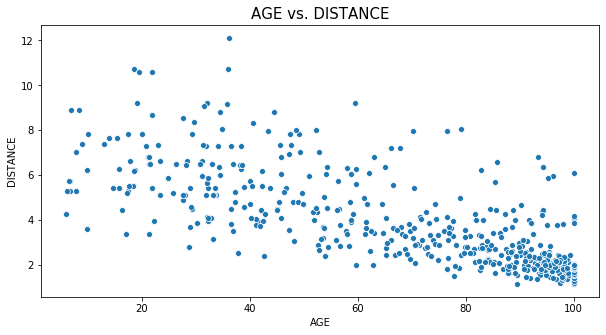

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns
boston_columns = boston_data.feature_names
df_boston = pd.DataFrame(boston_data.data)
df_boston.columns = boston_columns
#df_boston.head()
age_iqr = df_boston["AGE"].quantile(.75) - df_boston["AGE"].quantile(.25)
print("The inter-quartile range for AGE feature : ",age_iqr,"\n\n")
boston_filtered = df_boston[~((df_boston["AGE"] < (df_boston["AGE"].median() - 1.5 * age_iqr)) |
                  (df_boston["AGE"] > (df_boston["AGE"].median() + 1.5 * age_iqr)))]

corr_var = boston_filtered.corr()
corr_target = abs(corr_var["AGE"])
age_corr = corr_target.sort_values(ascending=False).drop(index = 'AGE').head(n=1)
print("Hightest correlated feature with AGE : ",age_corr,"\n\n")

x = boston_filtered["AGE"].values
y = boston_filtered["DIS"].values
print("Scatterplot between AGE and the highest correlated feature")
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x,y,data = boston_filtered )
ax.set_xlabel("AGE", fontsize = 10)
ax.set_ylabel("DISTANCE", fontsize = 10)
ax.set_title("AGE vs. DISTANCE", fontsize = 15)

#### Question 5 (10 points)

For rating_df, do the folling 3 data transformations to each column:

* min_max: 0-1 scale, defined as (x - min(x))/(max(x) - min(x))
* mean_centered: x - mean(x)
* z_score: (x - mean(x))/std(x)

This means, for instance, each column for min max should be scaled to where the max is 1 and the min is 0.

Hint, this should be done using 1 line, making use of broadcasting and rows and columnwise mean, min, max and standard deviation calculations.

Print out the 3 scaled dataframes.

In [37]:
import numpy as np 
import pandas as pd 

user_1 = np.array([4,2,5])
user_2 = np.array([1,5,4])
user_3 = np.array([2,4,2])
user_4 = np.array([3,5,4])

rating_matrix = np.array([user_1, user_2, user_3, user_4])

columns = ["star_wars", "harry_potter", "avengers"]
index = ["user_1", "user_2", "user_3", "user_4"]

rating_df = pd.DataFrame(rating_matrix, columns = columns, index = index)

print(rating_df,"\n\n\n")

min_max_df = (rating_df - rating_df.min())/(rating_df.max() - rating_df.min())
mean_df = rating_df - rating_df.mean()
zscore_df = (rating_df - rating_df.mean())/rating_df.std()
print("Min-Max df :",min_max_df,"\n\n\n\nMean_df:",mean_df,"\n\n\n\nZ-Score_df:",zscore_df)

        star_wars  harry_potter  avengers
user_1          4             2         5
user_2          1             5         4
user_3          2             4         2
user_4          3             5         4 



Min-Max df :         star_wars  harry_potter  avengers
user_1   1.000000      0.000000  1.000000
user_2   0.000000      1.000000  0.666667
user_3   0.333333      0.666667  0.000000
user_4   0.666667      1.000000  0.666667 



Mean_df:         star_wars  harry_potter  avengers
user_1        1.5          -2.0      1.25
user_2       -1.5           1.0      0.25
user_3       -0.5           0.0     -1.75
user_4        0.5           1.0      0.25 



Z-Score_df:         star_wars  harry_potter  avengers
user_1   1.161895     -1.414214  0.993399
user_2  -1.161895      0.707107  0.198680
user_3  -0.387298      0.000000 -1.390759
user_4   0.387298      0.707107  0.198680


#### Quesiton 6 (15 points)

Add a column to rating_df called "most_similar_user" that has the user_id of the most similar user for that given observation.  Define similarity using the euclidean distance between two rating vectors.  Note, when making a distance matrix, the min distance is going to be the distance between each user and themselves.  Make sure the most_similar_user is not the user themself.

For instance, for user_1, the most similar user, not including themself, is user_4.

Print out the dataframe with the new column.

In [23]:
user_1 = np.array([4,2,5])
user_2 = np.array([1,5,4])
user_3 = np.array([2,4,2])
user_4 = np.array([3,5,4])

rating_matrix = np.array([user_1, user_2, user_3, user_4])

columns = ["star_wars", "harry_potter", "avengers"]
index = ["user_1", "user_2", "user_3", "user_4"]

rating_df = pd.DataFrame(rating_matrix, columns = columns, index = index)

rating_df

,star_wars,harry_potter,avengers
user_1,4,2,5
user_2,1,5,4
user_3,2,4,2
user_4,3,5,4


In [38]:
from scipy.spatial.distance import pdist, squareform, cdist
dist_matrix = pd.DataFrame(cdist(rating_df,rating_df), index = index, columns = index)
temp_df = dist_matrix[dist_matrix > 0.01].idxmin(axis=1)
rating_df['most_similar_user'] = temp_df
rating_df

,star_wars,harry_potter,avengers,most_similar_user
user_1,4,2,5,user_4
user_2,1,5,4,user_4
user_3,2,4,2,user_2
user_4,3,5,4,user_2


#### Question 7 (10 points)

Use a for loop to make a 2,3 and 4 period rolling mean column for each user.  Making sure to add each column to the dataframe.

Print the dataframe out.

In [25]:
metric = np.array([5,3,2,4,5,1,4,1,4,2,5,3,1,2,3])
ids = np.array(["a","a","a","a","a","b","b","b","b","b","c","c","c","c","c"])

df = pd.DataFrame({
    "id":ids,
    "metric":metric
})
df

,id,metric
0,a,5
1,a,3
2,a,2
3,a,4
4,a,5
5,b,1
6,b,4
7,b,1
8,b,4
9,b,2


In [27]:
for i in range(2,5):
    x = df.groupby('id')['metric'].rolling(i).mean()
    df['Rolling_mean_%s' % i] = x.reset_index(0,drop=True)
df

,id,metric,Rolling_mean_2,Rolling_mean_3,Rolling_mean_4
0,a,5,NaN,NaN,NaN
1,a,3,4.0,NaN,NaN
2,a,2,2.5,3.333333,NaN
3,a,4,3.0,3.000000,3.50
4,a,5,4.5,3.666667,3.50
5,b,1,NaN,NaN,NaN
6,b,4,2.5,NaN,NaN
7,b,1,2.5,2.000000,NaN
8,b,4,2.5,3.000000,2.50
9,b,2,3.0,2.333333,2.75


In [39]:
# ###### SOLUTION 1 :


# for i in range(2,5):
#     df['Rolling_mean_%s' % i] = df.groupby('id')['metric'].rolling(i).mean().reset_index(0,drop=True)
# df

In [40]:
# ###### SOLUTION 2 :


# for i in range(0,df.shape[0]-1):
#     df.loc[df.index[i+1],'Rolling_mean_2'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] )/2),1)
    
# for i in range(0,df.shape[0]-2):
#     df.loc[df.index[i+2],'Rolling_mean_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

# for i in range(0,df.shape[0]-3):
#     df.loc[df.index[i+3],'Rolling_mean_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)

# df

In [41]:
# for i in range(2,5):
#     for j in range(0,df.shape[0]-i+1):
#         df.loc[df.index[j+i-1],'Rolling_mean_%s' % i] = np.round(((df.iloc[j,1]+ df.iloc[j+i-2,1] +df.iloc[j+i-1,1])/i),1)
#     #df.groupby('id')['Rolling_mean_%s' % i]
# df

#### Question 8 (15 points)

Find pairwise correlations for each ids period of data, meaning for each id a,b,c, treat metric for periods 1-5 as a vector, and find the correlations.  The result should be a 3 x 3 correlation matrix.

Find the highest correlating users (negative or positive) using the correlation matrix.  Create  a dataframe with two columns,  the first being an id (a,b,c) and the second column the highest correlating id.

Print the 3 by 3 correlation matrix and the two column dataframe with the most similar ids.

In [29]:
metric = np.array([5,3,2,4,5,1,4,1,4,2,5,3,1,2,3])
periods = [1,2,3,4,5] * 3
ids = np.array(["a","a","a","a","a","b","b","b","b","b","c","c","c","c","c"])

df = pd.DataFrame({
    "id":ids,
    "metric":metric,
    "period": periods
})

df

,id,metric,period
0,a,5,1
1,a,3,2
2,a,2,3
3,a,4,4
4,a,5,5
5,b,1,1
6,b,4,2
7,b,1,3
8,b,4,4
9,b,2,5


In [30]:
melted_df = pd.melt(df, id_vars = "id", value_vars = ["metric", "period"])
pivoted = melted_df.pivot_table(index = "id", columns = "variable", values = "value", aggfunc = "sum")
pivot_df = pivoted.rename_axis(None).rename_axis(None, axis=1)
correlation_matrix = pd.DataFrame(squareform(pdist(pivot_df)))
correlation_matrix.index = ['a','b','c']
correlation_matrix.columns = ['a','b','c']
similar_id_matrix = pd.DataFrame(correlation_matrix[correlation_matrix > 0.01].idxmin(axis=1))
print("The correlation Matrix :\n" ,correlation_matrix,"\n\nThe Similarity matrix :",similar_id_matrix)

The correlation Matrix :
      a    b    c
a  0.0  7.0  5.0
b  7.0  0.0  2.0
c  5.0  2.0  0.0 

The Similarity matrix :    0
a  c
b  c
c  b
